### 머신러닝 과정
- 1. 문제 정의
- 2. 데이터 수집
- 3. 데이터 전처리 
- 4. 탐색적 데이터 분석
- 5. 모델 선택 및 하이퍼 파라미터 조정
- 6. 모델 학습
- 7. 모델 평가

### 1. 문제 정의
- 생존자와 사망자를 예측
- Kaggle경지대회에서 높은 순위를 차지하는 것
- 머신러닝 전체 과정을 직접 체험해보는 것

### 2. 데이터 수집
- kaggle에 있는 타이타닉 데이터를 확보

In [1]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# 데이터 불러오기(PassengerId라는 컬럼을 인덱스로 설정할 것)
# ind_col = '컬럼명' : 기존 데이터셋에 있는 컬럼을 인덱스로 설정하는 기능 
train = pd.read_csv('./data/train.csv', index_col='PassengerId')
test = pd.read_csv('./data/test.csv', index_col='PassengerId')

In [3]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# 데이터 프레임의 정보 확인하기 -train
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
# 데이터 프레임의 정보 확인하기 -test
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


- train 결측치 컬럼 : age, cabin, embarked
- test 결측치 컬럼 : age, fare, cabin

In [7]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 컬럼 정리 
- 'Survived' : 생존 여부 0 : 사망 / 1: 생존
- 'Pclass' : 승객 등급 1, 2, 3
- 'Name' :승객의 이름,
- 'Sex' : 성별
- 'Age' : 나이
- 'SibSp' : 배우자와 형제 자매
- 'Parch' : 부모와 자식
- 'Ticket' : 티켓 번호
- 'Fare' : 승선 요금
- 'Cabin' : 객실의 번호
- 'Embarked' : 승선지 s = 사우스햄튼, q = 퀸즈타운, c=쉘부르크

###  3. 데이터 전처리
- 결측치를 채워보자
- train 결측치 컬럼 : Age, Cabin, Embarked
- test의 결측치 컬럼 : Age, Fare, Cabin

**Age 컬럼 채워보기**
- 어떻게 채워야 할까? 다른 컬럼과 연관 관계를 맺어서 값을 채워주자
- 상관관계를 확인하고 상관관계가 높은 걸 사용해보자

In [8]:
# 경고창 무시
import warnings
warnings.filterwarnings('ignore')

- Pclass가 가장 높은 상관관계를 갖는다.
- 생존에 관련이 높은 성별을 그룹핑해서 활용해보자.

In [9]:
pt1 = train[['Pclass', 'Sex', 'Age']].groupby(['Pclass', 'Sex']).mean()
pt1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [10]:
# 하나의 값에 접근을 해보기
pt1.loc[(1, 'female'), 'Age']

34.61176470588235

In [11]:
pt1.loc[(3, 'male')]

Age    26.507589
Name: (3, male), dtype: float64

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [13]:
# 함수를 만들어서 나이를 채워보자
def fill_age(row):
    #만약 나이가 결측치라면 피벗 테이블에서 값을 가져와서 채워줘
    if np.isnan(row['Age']):
        return pt1.loc[(row['Pclass'], row['Sex'])]
    #나이가 있다면 기존 데이터를 사용할거야
    else:
        return row['Age']

In [14]:
# apply 함수를 이용해서 데이터 프레임에 fill_age 함수를 적용해보자
# apply(적용시킬 함수의 이름, 축 설정)
train['Age'] = train.apply(fill_age, axis=1).astype('int64')

In [15]:
# train 정보 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [16]:
# train['Age'] 출력
train['Age']

PassengerId
1      22
2      38
3      26
4      35
5      35
       ..
887    27
888    19
889    21
890    26
891    32
Name: Age, Length: 891, dtype: int64

In [17]:
# train에서 해준 전처리 방식대로 test도 똑같이 처리해준다
test['Age'] = test.apply(fill_age, axis=1).astype('int64')

In [18]:
test['Age']

PassengerId
892     34
893     47
894     62
895     27
896     22
        ..
1305    26
1306    39
1307    38
1308    26
1309    26
Name: Age, Length: 418, dtype: int64

**Embarked 컬럼 결측치 채우기**
- 각각의 갯수를 먼저 파악해보자

In [19]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
#fillna 함수를 이용해서 결측치르 채워주자
train['Embarked'] = train['Embarked'].fillna('S')

In [21]:
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

**Fare 채우기**
- test에 있는 결측치였다!

In [22]:
# 상관계수 확인
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.066538,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.410104,0.083081,0.018443,-0.549500
Age,-0.066538,-0.410104,1.000000,-0.251439,-0.178855,0.120173
SibSp,-0.035322,0.083081,-0.251439,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.178855,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.120173,0.159651,0.216225,1.000000


In [23]:
pt2 = train[['Pclass', 'Sex', 'Fare']].groupby(['Pclass', 'Sex']).mean()
pt2

Fare
Pclass Sex               
1      female  106.125798
       male     67.226127
2      female   21.970121
       male     19.741782
3      female   16.118810
       male     12.661633

In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


In [25]:
# 불리언 인덱싱을 이용한 결측치 값 확인하기
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60,0,0,3701,NaN,NaN,S


In [26]:
#결측치 값 채워주기
test['Fare'] = test['Fare'].fillna(12.661633)

In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


**Cabin 컬럼 확인하기**

In [28]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

- 객실 번호 같은 경우 알파벳과 동일한 나열되어 있다.
- 타이타닉 호의 단면도를 확인해 본 결과 알파벳은 층의 개념이 적용된 걸 확인할 수 있었다.
- 뒤의 번호는 객실 번호로 보이고 큰 의미가 없어 보인다.
- 층에 해당하는 알파벳만 가져와서 사용해보자
- 그전에 많은 결측치를 어떻게 해결해야할까?

In [29]:
# 임의의 값을 채워서 새로운 컬럼을 만들어 보자
train['Deck'] = train['Cabin'].fillna('M')

In [30]:
test['Deck'] = test['Cabin'].fillna('M')

In [31]:
train['Deck'] = train["Deck"].str[0]
test['Deck'] = test["Deck"].str[0]

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
 11  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 90.5+ KB


In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
 10  Deck      418 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 39.2+ KB


### 4. 탐색적 데이터 분석
- train셋을 이용해서 데이터에 인사이트를 살펴본다.
- 상대적으로 사이즈가 작은 테스트 데이터를 이용하는 것보다 인사이트를 확실하게 볼 수 있고 일반화에 도움이 된다.

**Deck 컬럼 확인해보기**

In [34]:
train_deck = train[['Deck', 'Survived', 'Name']].groupby(['Deck', 'Survived']).count()

In [35]:
train_deck

Name
Deck Survived      
A    0            8
     1            7
B    0           12
     1           35
C    0           24
     1           35
D    0            8
     1           25
E    0            8
     1           24
F    0            5
     1            8
G    0            2
     1            2
M    0          481
     1          206
T    0            1

<Axes: xlabel='Deck', ylabel='count'>

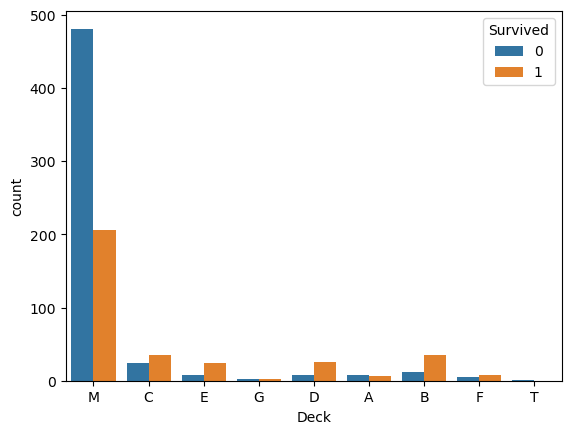

In [36]:
# Deck 컬럼 시각화 진행
sns.countplot(data = train,
             x = 'Deck',
             hue = 'Survived'
             )

- M(우리가 임의로 지정해준 밸류값)에서 많은 사람들이 죽고, 사람들이 살아있는 빈도수도 어느정도 많다.
- 인사이트 자체를 볼 수 있다고 판단된다.

**Pclass 시각화 해보기**

<Axes: xlabel='Pclass', ylabel='count'>

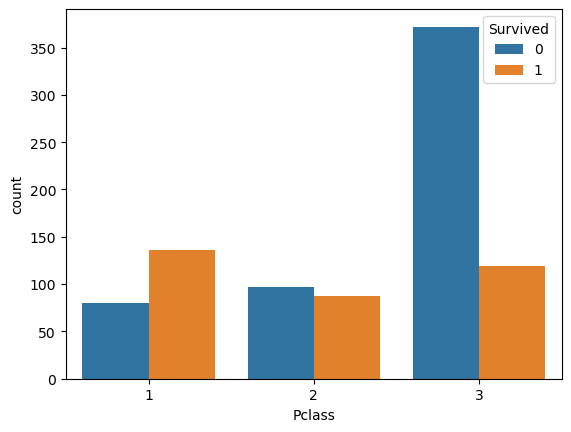

In [37]:
# Pclass 컬럼 시각화 진행
sns.countplot(data = train,
             x = 'Pclass',
             hue = 'Survived'
             )

- 3등급이 사람이 많이 죽었구나
- 1등급의 사람의 생존율이 높구나

<Axes: xlabel='Deck', ylabel='count'>

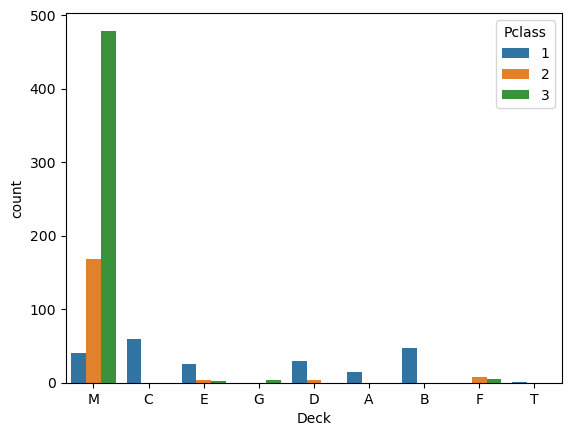

In [38]:
# Deck과 Pclass 컬럼 시각화 진행
sns.countplot(data = train,
             x = 'Deck',
             hue = 'Pclass'
             )

- M에서 3등급 사람이 많았구나.

<Axes: xlabel='Sex', ylabel='count'>

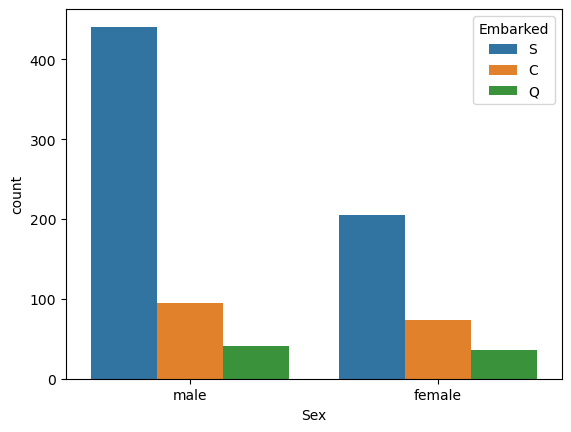

In [39]:
# Sex/Embarked 시각화
sns.countplot(data = train,
             x = 'Sex',
             hue = 'Embarked'
             )

- 남자가 많이 탔다
- 사우스 햄튼에서 많이 탔구나.

<Axes: xlabel='Embarked', ylabel='count'>

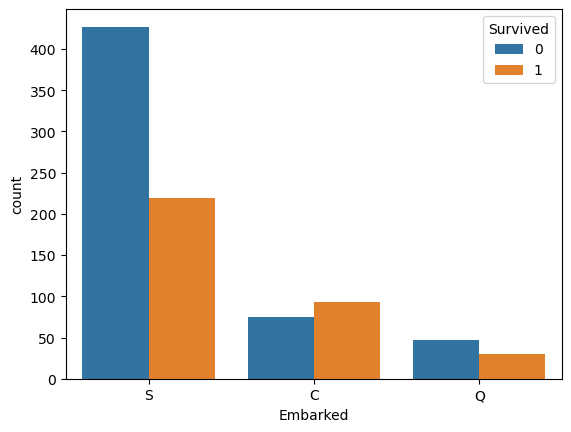

In [40]:
#Embarked/ Survived 시각화
sns.countplot(data = train,
             x = 'Embarked',
             hue = 'Survived')

- 사우스 햄튼에서 탄 사람들이 많이 죽었구나

<Axes: xlabel='Embarked', ylabel='count'>

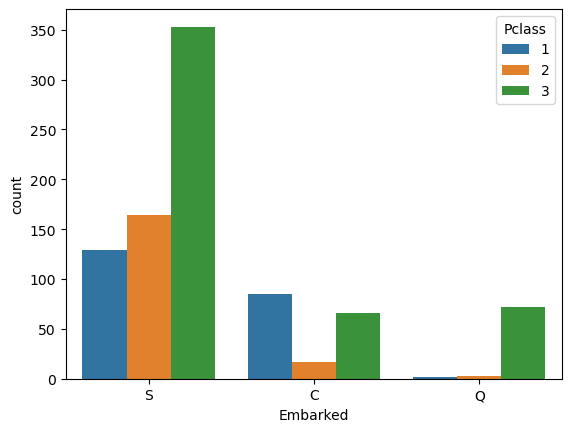

In [41]:
# Embarked/Pclass
sns.countplot(data = train,
             x = 'Embarked',
             hue = 'Pclass')

- 사우스 햄튼에서 승선한 사람은 3등급이 많았다.

<Axes: xlabel='Sex', ylabel='count'>

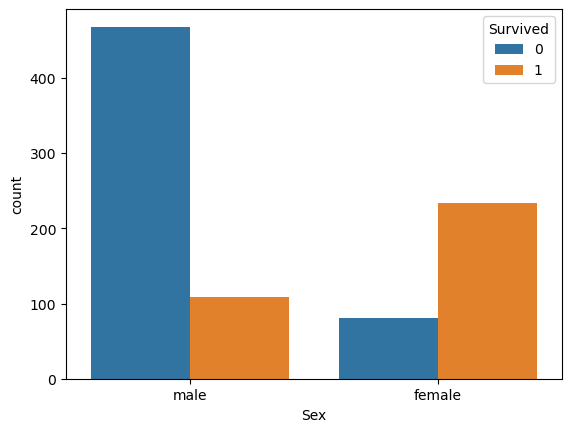

In [42]:
# Sex/Survived
sns.countplot(data=train,
             x = 'Sex',
             hue = 'Survived')

- 남자가 많이 죽었고, 여자가 많이 살았다.
- 이 시대의 시대상이 어땠길래? 노블레서 오블리주

<Axes: xlabel='Deck', ylabel='count'>

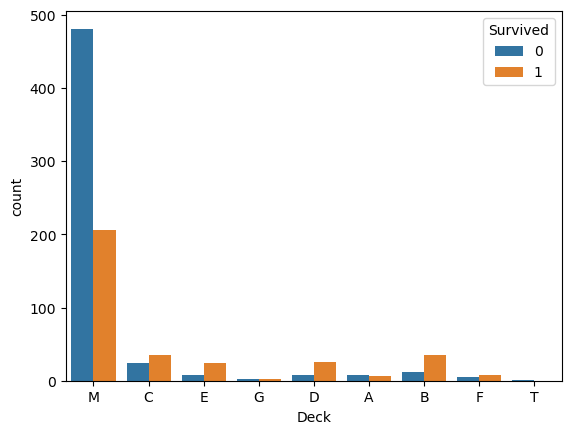

In [43]:
# Deck/Survived 시각화
sns.countplot(data = train,
             x = 'Deck',
             hue = 'Survived')

### 수치형 데이터 살펴보기
- Fare, Age, SibSp,Parch

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
 11  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 90.5+ KB


**Age 컬럼 시각화**

<Axes: xlabel='Sex', ylabel='Age'>

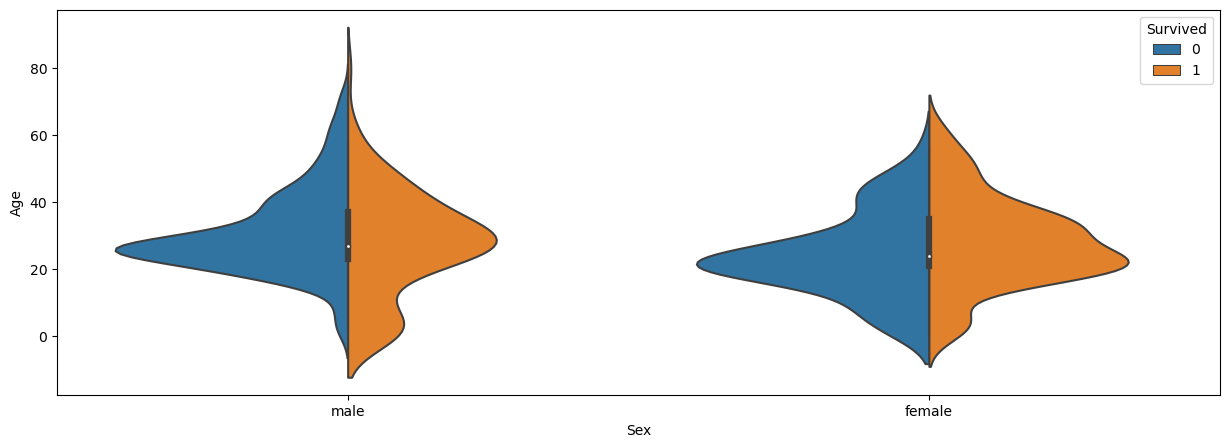

In [45]:
# 데이터의 분포를 확인할 때 여러가지 시각화 기법을 사용하는데 유명한 것 중 하나가 violinplot
plt.figure(figsize=(15, 5))
sns.violinplot(data = train, # 데이터 프레임
              x = 'Sex', # X축에 들어갈 데이터
              y = 'Age', # y축에 들어갈 데이터
              hue = 'Survived',
              split = True)


- 20대에서 40대 사이의 사람이 많이 죽었다.
- 20대 이하(미성년자) 데이터를 살펴보면 남자아이들은 대부분 살아남았고, 여아는 생존률이 절반정도이다?
- Why?

**Fare 살펴보기**

<Axes: xlabel='Sex', ylabel='Fare'>

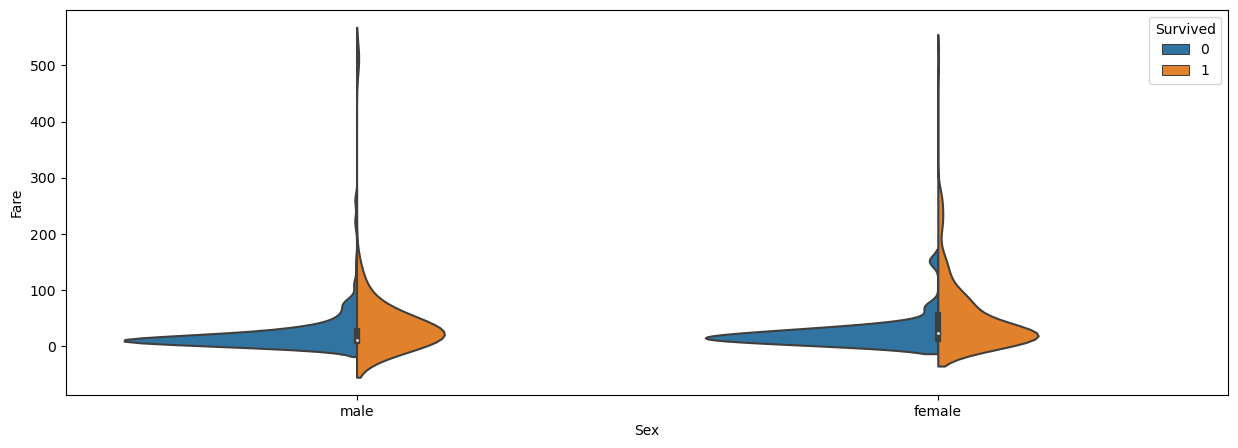

In [46]:
plt.figure(figsize=(15, 5))
sns.violinplot(data = train, # 데이터 프레임
              x = 'Sex', # X축에 들어갈 데이터
              y = 'Fare', # y축에 들어갈 데이터
              hue = 'Survived',
              split = True)

- 돈을 적게 낸 사람들이 많이 죽었구나

**SibSp,Parch에 대해 생각해보기**
- SibSp : 형제 자매 배우자
- Parch : 부모 자식
- 우리는 이걸 묶어서 가족이라고 부르기로 했어요
- 가족으로 통합해보는 것은 어떨까?

- 특성 공학 : 기존에 데이터들을 이용해서 새로운 특성을 만들어 내는 것
- Parch와 SibSp 컬럼을 더해서 Family_Size라는 새로운 특성을 만들어보자
- 주의사항) train에서 진행한 작업은 test에서도 진행한다.

In [47]:
train['Family_Size'] = train['Parch'] + train['SibSp'] + 1
test['Family_Size'] = test['Parch'] + test['SibSp'] + 1

In [48]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    int64  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    object 
 11  Deck         891 non-null    object 
 12  Family_Size  891 non-null    int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 97.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclas

(None, None)

<Axes: xlabel='Family_Size', ylabel='count'>

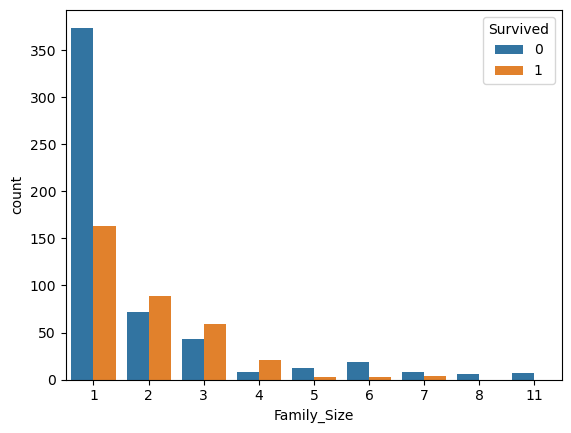

In [49]:
sns.countplot(data = train,
             x = 'Family_Size',
             hue = 'Survived')

- 혼자 왔을 때 많이 죽었다. : 도움을 못 받았다.
- 2~4명 사이 구성원인 부분은 많이 살아 남았다.
- 5명 이상인 경우 많이 죽었다.

- 그래프가 너무 복잡하다. 같은 인사이트를 가진 데이터들을 묶어줘 보자
- 수치형의 데이터를 범주형으로 바꿔주자(Binning)

In [50]:
# 가족 사이즈가 1이면 Alone, 2 ~ 4이면 Small, 5 이상이면 Large
# train/ test 모두 적용
bins = [0, 1, 4, 11] # 각각 데이터를 쪼개줄 기준점
label = ['Alone', 'Small', 'Large'] # 나눠진 부분에 붙은 꼬리표 / 태그
train['Family_Group'] = pd.cut(train['Family_Size'], bins=bins, labels=label)
test['Family_Group'] = pd.cut(train['Family_Size'], bins=bins, labels=label)

<Axes: xlabel='Family_Group', ylabel='count'>

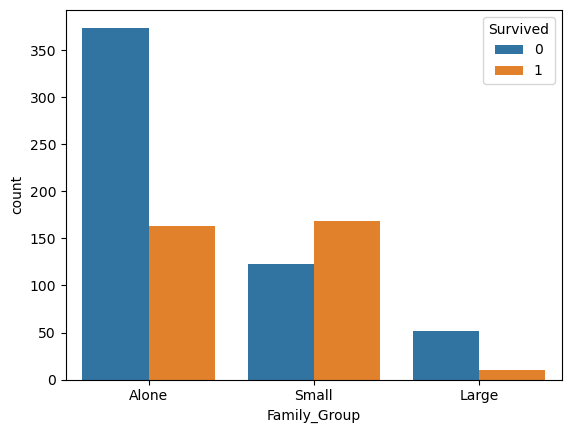

In [51]:
sns.countplot(data=train,
             x='Family_Group',
             hue = 'Survived')

- Binning은 데이터를 범주화 시키는 작업
- 같은 인사이트를 가진 특성끼리 묶어주는 작업을 통해서 사소한 관촬의 오류를 줄일 수 있다.

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Name          891 non-null    object  
 3   Sex           891 non-null    object  
 4   Age           891 non-null    int64   
 5   SibSp         891 non-null    int64   
 6   Parch         891 non-null    int64   
 7   Ticket        891 non-null    object  
 8   Fare          891 non-null    float64 
 9   Cabin         204 non-null    object  
 10  Embarked      891 non-null    object  
 11  Deck          891 non-null    object  
 12  Family_Size   891 non-null    int64   
 13  Family_Group  891 non-null    category
dtypes: category(1), float64(1), int64(6), object(6)
memory usage: 130.7+ KB


### Text 데이터 다루기
-

In [53]:
train['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

- 데이터의 분포를 확인했을때, 넓고 얇은 형태이다. 고유값이 상당히 많은 데이터이다.
- 외국 이름 특성상 미들네임이라는 부분에는 호칭 부분이 들어간다(성별, 직업)
- 미들네임만 추출해보자

In [54]:
# 하나의 데이터만 한번 미들네임 추출해보자
train['Name'][1].split(',')[1].split('.')[0].strip()

'Mr'

In [55]:
def split_name(row):
    return row.split(',')[1].split('.')[0].strip()

In [56]:
#apply 함수를 통해서 판다스 시리즈에 함수를 적용시켜보자
train['Title'] = train['Name'].apply(split_name)

In [57]:
test['Title'] = test['Name'].apply(split_name)

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Name          891 non-null    object  
 3   Sex           891 non-null    object  
 4   Age           891 non-null    int64   
 5   SibSp         891 non-null    int64   
 6   Parch         891 non-null    int64   
 7   Ticket        891 non-null    object  
 8   Fare          891 non-null    float64 
 9   Cabin         204 non-null    object  
 10  Embarked      891 non-null    object  
 11  Deck          891 non-null    object  
 12  Family_Size   891 non-null    int64   
 13  Family_Group  891 non-null    category
 14  Title         891 non-null    object  
dtypes: category(1), float64(1), int64(6), object(7)
memory usage: 137.7+ KB


In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        418 non-null    int64   
 1   Name          418 non-null    object  
 2   Sex           418 non-null    object  
 3   Age           418 non-null    int64   
 4   SibSp         418 non-null    int64   
 5   Parch         418 non-null    int64   
 6   Ticket        418 non-null    object  
 7   Fare          418 non-null    float64 
 8   Cabin         91 non-null     object  
 9   Embarked      418 non-null    object  
 10  Deck          418 non-null    object  
 11  Family_Size   418 non-null    int64   
 12  Family_Group  0 non-null      category
 13  Title         418 non-null    object  
dtypes: category(1), float64(1), int64(5), object(7)
memory usage: 46.3+ KB


<Axes: xlabel='Title', ylabel='count'>

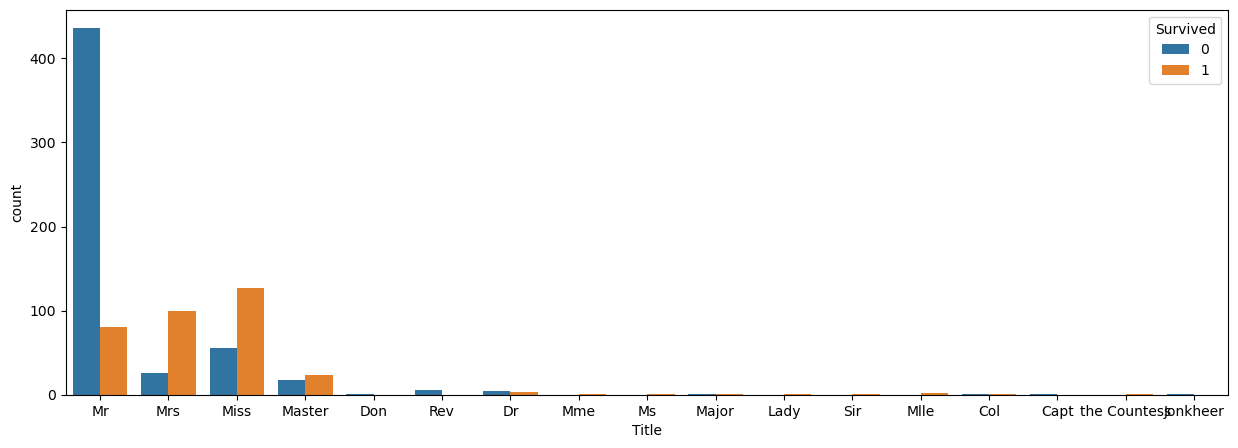

In [60]:
plt.figure(figsize = (15, 5))
sns.countplot(data=train, # 데이터 프레임 명
            x = 'Title',
            hue = 'Survived')

- Mr가 많이 죽었다
- 여성 호칭을 가지고 있는 사람들이 생존율이 높다
- Master라는 호칭도 많이 살아남았다.
- rev라는 호칭을 가진 사람은 다 죽었다.
- 호칭이 가지는 의미가 뭘까?

- 'Mr' : 일반적인 남자를 부르는 호칭
- 'Mrs' : 결혼한 여자
- 'Miss' : 결혼 안한 여자
- 'Master' : 나이가 어린 도련님
- 'Don' : 일반적으로 남자를 높여부르는 호칭
- 'rev' : 목사
- 'Dr' : 의사/박사
- 'Mme' : 연로하신 기혼 여성
- 'Ms' : 여성에 대한 호칭
- 'Major' : 군인
- 'Lady' : 영애, 신분이 높은 미혼 여성
- 'Sir' : 기사
- 'Mile' : 마드모아젤, 미혼 여성을 부르는 호칭
- 'Col' : 대령
- 'Capt' : 선장
- 'the Countess' : 주지사
- 'Jonkheer' : 작위는 있으나, 영지는 없는 사람

- 확실한 인사이트를 가진 mr, miss, mrs, master, rev를제외한 다른 컬럼은 수가 너무 적다.
- 인사이트를 확보하기 어려우니 other 데이터로 통합을 시켜주자

In [61]:
# 모든 호칭을 title이라는 변수에 리스트로 저장해주자
title = ['Mr', 'Mrs', 'Miss', 'Master', 'Rev', 'Don', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer']

In [62]:
convert_title = ['Mr', 'Mrs', 'Miss', 'Master', 'Rev'] + ['Other'] * 12
convert_title

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Rev',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other']

In [63]:
title_zip = dict(zip(title, convert_title))
title_zip

{'Mr': 'Mr',
 'Mrs': 'Mrs',
 'Miss': 'Miss',
 'Master': 'Master',
 'Rev': 'Rev',
 'Don': 'Other',
 'Dr': 'Other',
 'Mme': 'Other',
 'Ms': 'Other',
 'Major': 'Other',
 'Lady': 'Other',
 'Sir': 'Other',
 'Mlle': 'Other',
 'Col': 'Other',
 'Capt': 'Other',
 'the Countess': 'Other',
 'Jonkheer': 'Other'}

In [64]:
train['Title'] = train['Title'].map(title_zip)

In [65]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev'], dtype=object)

In [66]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [67]:
# Dona라는 호칭을 가진 데이터의 갯수를 확인해보자
test[test['Title'] == 'Dona']

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family_Size,Family_Group,Title
PassengerId,,,,,,,,,,,,,,
1306,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9,C105,C,C,1,NaN,Dona


In [68]:
title_zip['Dona'] = 'Other'

In [69]:
title_zip

{'Mr': 'Mr',
 'Mrs': 'Mrs',
 'Miss': 'Miss',
 'Master': 'Master',
 'Rev': 'Rev',
 'Don': 'Other',
 'Dr': 'Other',
 'Mme': 'Other',
 'Ms': 'Other',
 'Major': 'Other',
 'Lady': 'Other',
 'Sir': 'Other',
 'Mlle': 'Other',
 'Col': 'Other',
 'Capt': 'Other',
 'the Countess': 'Other',
 'Jonkheer': 'Other',
 'Dona': 'Other'}

In [70]:
test['Title'] = test['Title'].map(title_zip)

In [71]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev'], dtype=object)

In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Name          891 non-null    object  
 3   Sex           891 non-null    object  
 4   Age           891 non-null    int64   
 5   SibSp         891 non-null    int64   
 6   Parch         891 non-null    int64   
 7   Ticket        891 non-null    object  
 8   Fare          891 non-null    float64 
 9   Cabin         204 non-null    object  
 10  Embarked      891 non-null    object  
 11  Deck          891 non-null    object  
 12  Family_Size   891 non-null    int64   
 13  Family_Group  891 non-null    category
 14  Title         891 non-null    object  
dtypes: category(1), float64(1), int64(6), object(7)
memory usage: 137.7+ KB


### Ticket

In [73]:
train['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [74]:
train.drop('Ticket', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)

- 사용하기 어려운 컬럼은 판단 후 삭제하는 것도 하나의 방법

- 삭제할 컬럼
    - Name, SibSp, Parch, Cabin, Family_Size

In [75]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [76]:
train.drop('SibSp', axis=1, inplace=True)
test.drop('SibSp', axis=1, inplace=True)

In [77]:
train.drop('Parch', axis=1, inplace=True)
test.drop('Parch', axis=1, inplace=True)

In [78]:
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [79]:
train.drop('Family_Size', axis=1, inplace=True)
test.drop('Family_Size', axis=1, inplace=True)

### 문제와 답 데이터 분리

In [80]:
train

,Survived,Pclass,Sex,Age,Fare,Embarked,Deck,Family_Group,Title
PassengerId,,,,,,,,,
1,0,3,male,22,7.2500,S,M,Small,Mr
2,1,1,female,38,71.2833,C,C,Small,Mrs
3,1,3,female,26,7.9250,S,M,Alone,Miss
4,1,1,female,35,53.1000,S,C,Small,Mrs
5,0,3,male,35,8.0500,S,M,Alone,Mr
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27,13.0000,S,M,Alone,Rev
888,1,1,female,19,30.0000,S,B,Alone,Miss
889,0,3,female,21,23.4500,S,M,Small,Miss


In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Sex           891 non-null    object  
 3   Age           891 non-null    int64   
 4   Fare          891 non-null    float64 
 5   Embarked      891 non-null    object  
 6   Deck          891 non-null    object  
 7   Family_Group  891 non-null    category
 8   Title         891 non-null    object  
dtypes: category(1), float64(1), int64(3), object(4)
memory usage: 95.9+ KB


In [82]:
# X_train = train.iloc[:,1:]
# y_train = train.iloc[:, 1]
# X_test = test

X_train = train.drop('Survived', axis=1)
y_train = train['Survived']
X_test = test

In [83]:
X_train.shape, y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [84]:
((891, 8), (9,), (418, 8))

((891, 8), (9,), (418, 8))

In [85]:
X_train

,Pclass,Sex,Age,Fare,Embarked,Deck,Family_Group,Title
PassengerId,,,,,,,,
1,3,male,22,7.2500,S,M,Small,Mr
2,1,female,38,71.2833,C,C,Small,Mrs
3,3,female,26,7.9250,S,M,Alone,Miss
4,1,female,35,53.1000,S,C,Small,Mrs
5,3,male,35,8.0500,S,M,Alone,Mr
...,...,...,...,...,...,...,...,...
887,2,male,27,13.0000,S,M,Alone,Rev
888,1,female,19,30.0000,S,B,Alone,Miss
889,3,female,21,23.4500,S,M,Small,Miss


In [86]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        891 non-null    int64   
 1   Sex           891 non-null    object  
 2   Age           891 non-null    int64   
 3   Fare          891 non-null    float64 
 4   Embarked      891 non-null    object  
 5   Deck          891 non-null    object  
 6   Family_Group  891 non-null    category
 7   Title         891 non-null    object  
dtypes: category(1), float64(1), int64(2), object(4)
memory usage: 89.0+ KB


In [87]:
cat_feature = ['Sex', 'Embarked', 'Deck', 'Family_Group', 'Title']

In [88]:
#원핫인코딩 진행
for cat_name in cat_feature:
    dummy = pd.get_dummies(X_train[cat_name], prefix = cat_name)
    X_train = pd.concat([X_train, dummy], axis = 1)
    X_train.drop(cat_name, axis = 1, inplace = True)

In [89]:
X_train

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,...,Deck_T,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,22,7.2500,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1,38,71.2833,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,3,26,7.9250,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,1,35,53.1000,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
5,3,35,8.0500,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,27,13.0000,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
888,1,19,30.0000,1,0,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0
889,3,21,23.4500,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [90]:
for cat_name in cat_feature:
    dummy = pd.get_dummies(X_test[cat_name], prefix = cat_name)
    X_test = pd.concat([X_test, dummy], axis = 1)
    X_test.drop(cat_name, axis = 1, inplace = True)

In [91]:
X_test

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,...,Deck_M,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,34,7.8292,0,1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
893,3,47,7.0000,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
894,2,62,9.6875,0,1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
895,3,27,8.6625,0,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
896,3,22,12.2875,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,26,8.0500,0,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
1306,1,39,108.9000,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1307,3,38,7.2500,0,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0


In [92]:
X_train.shape, X_test.shape

((891, 26), (418, 25))

In [93]:
set(X_train) - set(X_test)

{'Deck_T'}

In [94]:
# 불리언 인덱싱을 통해서 Deck_T라는 값을 가진 데이터 확인
X_train[X_train['Deck_T']==1]

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,...,Deck_T,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
PassengerId,,,,,,,,,,,,,,,,,,,,,
340,1,45,35.5,0,1,0,0,1,0,0,...,1,1,0,0,0,0,1,0,0,0


In [95]:
# X_test에 Deck_T 추가해주기
X_test['Deck_T'] = 0

In [96]:
set(X_train) - set(X_test)

set()

In [97]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass              418 non-null    int64  
 1   Age                 418 non-null    int64  
 2   Fare                418 non-null    float64
 3   Sex_female          418 non-null    uint8  
 4   Sex_male            418 non-null    uint8  
 5   Embarked_C          418 non-null    uint8  
 6   Embarked_Q          418 non-null    uint8  
 7   Embarked_S          418 non-null    uint8  
 8   Deck_A              418 non-null    uint8  
 9   Deck_B              418 non-null    uint8  
 10  Deck_C              418 non-null    uint8  
 11  Deck_D              418 non-null    uint8  
 12  Deck_E              418 non-null    uint8  
 13  Deck_F              418 non-null    uint8  
 14  Deck_G              418 non-null    uint8  
 15  Deck_M              418 non-null    uint8  
 16  Famil

In [98]:
X_test = X_test[X_train.columns]

In [99]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass              418 non-null    int64  
 1   Age                 418 non-null    int64  
 2   Fare                418 non-null    float64
 3   Sex_female          418 non-null    uint8  
 4   Sex_male            418 non-null    uint8  
 5   Embarked_C          418 non-null    uint8  
 6   Embarked_Q          418 non-null    uint8  
 7   Embarked_S          418 non-null    uint8  
 8   Deck_A              418 non-null    uint8  
 9   Deck_B              418 non-null    uint8  
 10  Deck_C              418 non-null    uint8  
 11  Deck_D              418 non-null    uint8  
 12  Deck_E              418 non-null    uint8  
 13  Deck_F              418 non-null    uint8  
 14  Deck_G              418 non-null    uint8  
 15  Deck_M              418 non-null    uint8  
 16  Deck_

### 모델 선택 및 학습
- KNN/Decision Tree

**트리모델 1**

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
# 모델 객체 생성
tree_ta01 = DecisionTreeClassifier() # 기본 모델

In [102]:
# 교차검증
from sklearn.model_selection import cross_val_score

In [103]:
result = cross_val_score(tree_ta01, X_train, y_train, cv=5)
print(result)
print(result.mean())

[0.78212291 0.7752809  0.82022472 0.76404494 0.79213483]
0.786761659657272


In [104]:
tree_ta01.fit(X_train, y_train)

DecisionTreeClassifier()

In [105]:
pre = tree_ta01.predict(X_test)
pre

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [106]:
omr = pd.read_csv('./data/sampleSubmission.csv')
omr

FileNotFoundError: [Errno 2] No such file or directory: './data/sampleSubmission.csv'

In [ ]:
omr['Survived'] = pre

In [ ]:
omr.to_csv('tree_ta01.csv', index=False)

### 하이퍼 파라미터 조절
- max_depth = 4

In [ ]:
# 모델 객체 생성하기
tree_ta02 = DecisionTreeClassifier(max_depth=4)

In [ ]:
result = cross_val_score(tree_ta02, X_train, y_train,cv = 5)
print(result)
print(result.mean())

In [ ]:
# 모델 학습
tree_ta02.fit(X_train, y_train)

In [ ]:
# 모델 예측
pre = tree_ta02.predict(X_test)
pre

In [ ]:
omr = pd.read_csv('./data/gender_submission.csv')

In [ ]:
omr['Survived'] = pre

In [ ]:
omr.to_csv('tree_ta02.csv', index=False)

In [ ]:
# for i in range(3):
tree_ta03 = DecisionTreeClassifier(max_depth=2)
result = cross_val_score(tree_ta03, X_train, y_train, cv = 4)
tree_ta03.fit(X_train, y_train)
pre = tree_ta03.predict(X_test)
omr = pd.read_csv('./data/gender_submission.csv')
omr['Survived'] = pre
omr.to_csv('tree_ta03.csv', index=False)

### knn 모델 사용해보기

In [ ]:
# 모델 import
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# 모델 객체 생성
knn_ta01 = KNeighborsClassifier()

In [ ]:
# 교차검증
result = cross_val_score(knn_ta01, X_train, y_train, cv = 5)

In [ ]:
# 모델학습
tree_ta01.fit(X_train, y_train)

In [ ]:
# 모델예측
pre = tree_ta01.predict(X_test)

In [ ]:
# 답안지
omr = pd.read_csv('./data/gender_submission.csv')

In [ ]:
omr['Survived'] = pre

In [ ]:
omr.to_csv('tree_ta04.csv', index = False)

### 하이퍼 파라미터 튜닝

In [ ]:
knn_ta02 = KNeighborsClassifier(n_neighbors=3)

In [ ]:
result = cross_val_score(knn_ta02, X_train, y_train, cv = 5)

In [ ]:
knn_ta02.fit(X_train, y_train)

In [ ]:
pre = knn_ta02.predict(X_test)

In [ ]:
omr = pd.read_csv('./data/gender_submission.csv')

In [ ]:
omr['Survived'] = pre

In [ ]:
omr.to_csv('knn_ta06.csv', index = False)

### 데이터 스케일링 실습

In [ ]:
# standard scaler
from sklearn.preprocessing import StandardScaler
#min_max_scaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# 스케일러 객체 생성
ss_scaler = StandardScaler()
mm_scaler = MinMaxScaler()

In [ ]:
# 스켕일러 학습 - 스탠다드 스케일러 편
ss_scaler.fit(X_train)

In [ ]:
# 스케일 변환
# transform()
ss_X_train = ss_scaler.transform(X_train)
ss_X_test = ss_scaler.transform(X_test)

In [ ]:
ss_X_train

### knn모델 사용해보기

In [ ]:
knn_ta_ss01 = KNeighborsClassifier()

In [ ]:
# 모델 교차검증 - 스케일링 된 데이터를 넣어보자
result = cross_val_score(knn_ta_ss01, ss_X_train, y_train, cv = 5)
print(result)
print(result.mean())

In [ ]:
# 모델 학습 - 스케일링 된 데이터를 넣어보자
knn_ta_ss01.fit(ss_X_train, y_train)

In [ ]:
# 모델 예측 - 스케일링 된 데이터를 넣어보자
pre = knn_ta_ss01.predict(ss_X_test)

In [ ]:
# 답안지 제작
omr = pd.read_csv('./data/gender_submission.csv')

In [ ]:
omr['Survived'] = pre

In [ ]:
omr.to_csv('knn_ta_ss01.csv', index=False)

### 앙상블 모델적용
- Random forest : 배깅의 대표적 모델
- Ada Boosting : 부스팅의 기본적 모델
- Gradient Boosting Model : 경사하강법 적용
- XG Boosting 
- LightGBM
- Voting

#### 1.Random Forest

In [ ]:
# 모델 import
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# 모델 객체 생성
rf_ta01 = RandomForestClassifier()# 기본 모델

In [ ]:
#모델 학습
rf_ta01.fit(X_train, y_train)

In [ ]:
# 교차검증
result = cross_val_score(rf_ta01, X_train, y_train, cv = 5)
print(result)
print(result.mean())

In [ ]:
# 모델에측
pre = rf_ta01.predict(X_test)

In [ ]:
# 답안지 작성
omr = pd.read_csv('./data/gender_submission.csv')

In [ ]:
omr['Survived'] = pre

In [ ]:
omr.to_csv('./rf_ta01.csv', index = False)

In [ ]:
# 하이퍼 파라미터 조정
rf_ta02 = RandomForestClassifier(n_estimators=400)

In [ ]:
# 모델학습
rf_ta02.fit(X_train, y_train)

In [ ]:
result = cross_val_score(rf_ta02, X_train, y_train)
print(result)
print(result.mean())

In [ ]:
pre = rf_ta02.predict(X_test)

In [ ]:
omr = pd.read_csv('./data/gender_submission.csv')

In [ ]:
omr['Survived'] = pre

In [ ]:
omr.to_csv('./rf_ta02.csv', index = False)

**2. Ada Boosting**

In [ ]:
# 모델 분류하기
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# 모델 객체 생성
ada_ta01 = AdaBoostClassifier()

In [ ]:
# 모델 학습
ada_ta01.fit(X_train, y_train)

In [ ]:
# 교차검증
result = cross_val_score(ada_ta01, X_train, y_train, cv = 5)
print(result)
print(result.mean())

In [ ]:
# 모델 예측
pre = ada_ta01.predict(X_test)
pre

In [ ]:
omr['Survived'] = pre

In [ ]:
omr.to_csv('ada_ta01.csv', index = False)

**그래디언트 부스팅 모델**

In [ ]:
# 모델 객체 생성
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# 모델 객체 생성
gbm_ta01 = GradientBoostingClassifier()

In [ ]:
# 모델 교차검증
result = cross_val_score(gbm_ta01, X_train, y_train, cv = 5)
print(result)
print(result.mean())

**XG Boosting, LightGBm**

In [ ]:
# XG Boost 설치
!pip install xgboost

In [ ]:
# light boost설치
!pip install lightgbm

In [ ]:
# 모델 import
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
# XG boost 사용하기
xgb_ta01 = XGBClassifier(n_estimators = 100,
                        random_state = 11)
xgb_ta01

In [ ]:
# 교차검증
result = cross_val_score(xgb_ta01, X_train, y_train, cv = 5)
print(result)
print(result.mean())

In [ ]:
lgbm_ta01 = LGBMClassifier(n_estimators=100,
                          random_state=11)
lgbm_ta01

In [ ]:
result = cross_val_score(lgbm_ta01, X_train, y_train)
print(result)
print(result.mean())

In [ ]:
xgb_ta01.fit(X_train, y_train)

In [ ]:
pre = xgb_ta01.predict(X_test)
pre

In [ ]:
omr = pd.read_csv('./data/gender_submission.csv')

In [ ]:
omr['Survived'] = pre

In [ ]:
omr.to_csv('./xgb_ta01.csv', index = False)

In [ ]:
lgbm_ta01.fit(X_train, y_train)

In [ ]:
pre = lgbm_ta01.predict(X_test)

In [ ]:
omr = pd.read_csv('./data/gender_submission.csv')

In [ ]:
omr['Survived'] = pre

In [ ]:
omr.to_csv('./lgbm_ta01.csv', index= False)

**voting**

In [ ]:
#voting 사용 전 사용할 모델 import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#XGBooost, lightGBM, RandomForest도 사용

In [ ]:
# 모델 객체 생성하기
knn = KNeighborsClassifier(n_neighbors=10)
tree = DecisionTreeClassifier(max_depth=5)
xgb = XGBClassifier(max_depth=3, n_estimators = 500)
lgbm = LGBMClassifier(max_depth=3, n_estimators = 500)
rf = RandomForestClassifier(max_depth=3, n_estimators = 500)

In [ ]:
# Voting 모델 import
from sklearn.ensemble import VotingClassifier

In [ ]:
# Voting 모델 만들기
voting_model = VotingClassifier(estimators =
                               [('knn', knn),
                               ('tree', tree),
                               ('xgb', xgb),
                               ('lgbm', lgbm),
                               ('rf', rf)],
                               voting='soft'#hard, soft설정
                               )

In [ ]:
result = cross_val_score(voting_model, X_train, y_train)
print(result)
print(result.mean())

### Grid_Search(그리드 서치)
- 하이퍼 파라미터 설정이 번거로워
- 이걸 좀 편하게 할 수 없을까?(최적의 조합식을 편하게 찾을 수 없을까?)

In [ ]:
# 그리드 서치 모듈 불러오기
from sklearn.model_selection import GridSearchCV

In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
#하이퍼 파라미터 담아주기
param_tree = {
    'max_depth' : range(1, 6),
    'min_samples_split' : range(1, 100, 10),
    'min_samples_leaf' : range(1,101, 10),
    'max_leaf_nodes' : range(1, 51, 10)
}

In [ ]:
# 그리드 서치 객체 만들기
# GridSearchCV(모델, 하이퍼 파리미터 목록, cv=?)
grid_search_tree = GridSearchCV(tree,
                               param_tree,
                               cv = 5)
grid_search_tree

In [ ]:
# 그리드 서치 학습하기
grid_search_tree.fit(X_train, y_train)

In [ ]:
# 최적의 하이퍼 파라미터 값을 확인해보기 : best_params_
grid_search_tree.best_params_

In [ ]:
# 최고의 파라미터를 사용한 교차 검증 점수 : best_score_
grid_search_tree.best_score_

In [ ]:
# 최고의 하이퍼 파라미터를 이용해서 모델을 만드는 방법(ver 1)
best_tree = DecisionTreeClassifier(max_depth = 4,
                                  max_leaf_nodes = 11,
                                  min_samples_leaf=1,
                                  min_samples_split=1)

In [ ]:
# 최고의 하이퍼 파라미터를 이용해서 모델을 만드는 방법(ver2)
# 최고 성능의 모델 뽑아보기 : Best_estimator_
grid_search_tree.best_estimator_

In [ ]:
best_tree = grid_search_tree.best_estimator_

In [ ]:
best_tree

In [ ]:
# 모델학습
best_tree.fit(X_train, y_train)

In [ ]:
# 모델예측
pre = best_tree.predict(X_test)
pre

### random forest 그리드 서치 둘러보기(Q.ver)

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
param_grid={
    'n_estimators' : [200, 400, 600, 800, 1000],
    'max_depth' : range(1, 6, 1),
    'min_samples_split' : range(2, 11, 2)
}

In [ ]:
grid_search_rf = GridSearchCV(rf_model, param_grid=param_grid, cv=5)

In [ ]:
# 그리드 서치 학습
grid_search_rf.fit(X_train, y_train)

In [ ]:
# 최고의 교차검증 점수
grid_search_rf.best_score_

In [ ]:
# 최적의 하이퍼 파라미터 
grid_search_rf.best_params_

In [ ]:
# 최고 성능의 모델
grid_search_rf.best_estimator_